# Loaded dice distributions

What if we can't observe a single roll. What if the dice get rolled, in this case, in sets of 10 at a time, and all we have is the total. The distribution of a `10d6` is not trivial! 

In fact, it is probably easier to calculate this distribution numerically rather than doing it analytically.

****

**What if we don't know the analytic distribution?**

Lets look at the Kolmogorov-Smirnov (KS) test. Note that it is meant for *continuous* distributions!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rolls_obs = np.loadtxt("loaded_many_100.txt")
unique, count_obs = np.unique(rolls_obs, return_counts=True)
count_obs = count_obs / count_obs.sum()  # Noramlise so it looks like a PDF

In [3]:
# What should we see if the null hypothesis is true
# What would we expect if we rolled 10 fair dice and added up all the numbers

# up to but not including 7, 500000 rolls, 10 dice
# axis=1 to sum up the 10 dice
rolls_fair = np.random.randint(low=1, high=7, size=(500000, 10)).sum(axis=1)
unique2, count_fair = np.unique(rolls_fair, return_counts=True)
count_fair = count_fair / count_fair.sum()  # Noramlise so it looks like a PDF

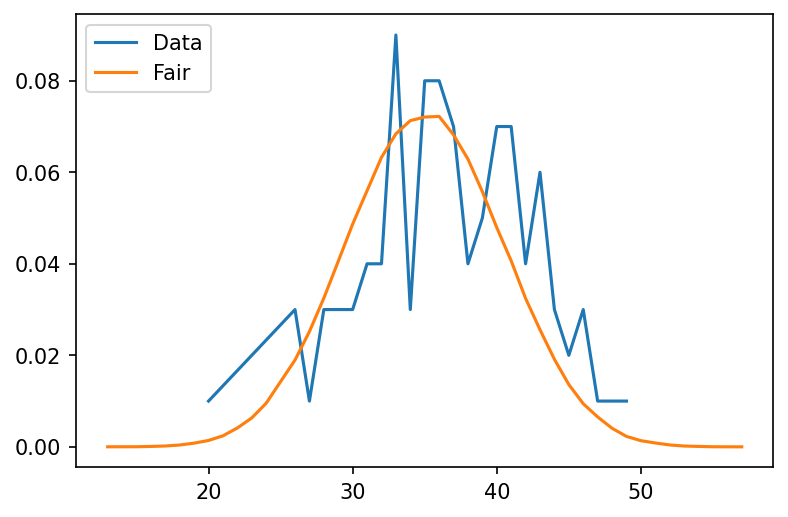

In [5]:
plt.rcParams['figure.dpi'] = 150
plt.plot(unique, count_obs, label="Data")
plt.plot(unique2, count_fair, label="Fair")
plt.legend()
plt.legend(loc=2);

# Jagged because there are only 100 datapoints

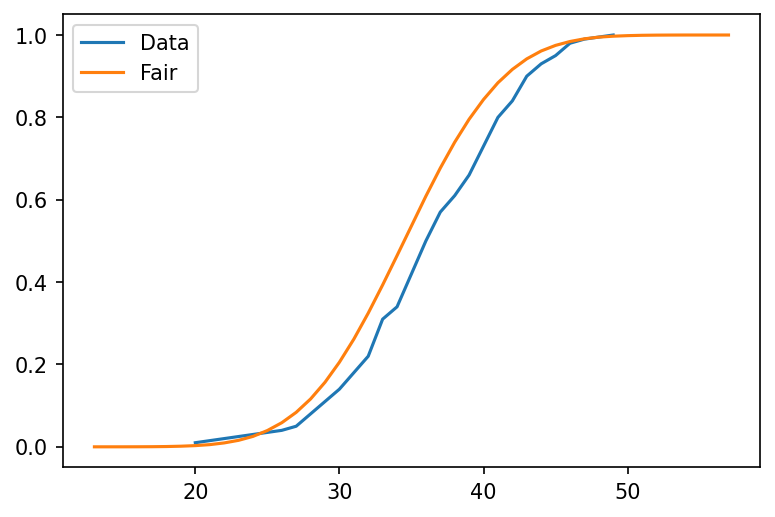

In [6]:
# Plot the CDF to get a less jagged plot
cdf_obs = count_obs.cumsum()
cdf_fair = count_fair.cumsum()
plt.plot(unique, cdf_obs, label="Data")
plt.plot(unique2, cdf_fair, label="Fair")
plt.legend(loc=2);

# Now a difference can be seen

In [8]:
from scipy.stats import ks_2samp
statistic, pvalue = ks_2samp(rolls_obs, rolls_fair)
print(f"KS test statistic of {statistic:.3f}, p-value of {pvalue:.3f}")

# What the KS test is create 2 empirical CDF functions, one for rolls_obs and one for rolls_fair
# It goes through them and calculates the difference between the two CDFs at each x-value
# i.e., heigh of the vertical lines between the two CDF functions
# The KS statistic reported is the height of the biggest vertical line it found
# The max distance bewteen the two CDF functions
# The p-value is the probability of getting that distance if the two distributions were drawn from the same underlying population
# The greater the distance, the stronger the evidence you have that you can reject the null hypothesis -> represented by p-value
# Note, if this were fair dice, we would still expect little noise due to randomness
# So if you consider p<0.05 to be significant, then this is significant
# But in this case we would not say that because the KS test isn't perfect
# Note, kstest can be imported (think of it as 1samp instead of 2samp), 
# where it accepts one set of observations and an analytical function (e.g., normal, etc..),
# and use the analytical function to create a CDF
# But there isn't a point really.... If the data is good enough to use an analytical function,
# then just generate a large random sample from the analytical function to get a perfect empirical CDF
# This gives you the flexibility to use ks_2samp instead and modify your distributions to take into account things like
# selection effects or data corruption, etc... because very few things in the real world are analytic
# Back to the main point of the issues with the KS test...
# It has problems at the tails when comparing there
# The Anderson-Darling (AD) test improves on it

KS test statistic of 0.135, p-value of 0.046


# Anderson-Darling Test

An improvement on the KS test that gives more weight to the tails of the distribution (whilst the K-S test gives more weight in the center). The default test requires testing against analytic distributions (like the KS test), however you can also test two observed distributions.

Can be applied to multiple samples.
Never use the KS test, this is simply better...

In [10]:
from scipy.stats import anderson_ksamp
statistic, critical_values, significance_level = anderson_ksamp([rolls_obs, rolls_fair])
print(f"AD test statistic of {statistic:.5f}, sig-level of {significance_level:.9f}")
# The critical values are for the test statistic for different thresholds of confidence
print(f"Test critical values are {critical_values}")
print("Significance-level analgous to p-value, and critical values are [25%, 10%, 5%, 2.5%, 1%]")
# Just use the statistic and significance level the critical values aren't too useful
# Can basically use this to quickly accept or reject your null hypothesis by determining if one distribution comes from another

AD test statistic of 5.40646, sig-level of 0.002486740
Test critical values are [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
Significance-level analgous to p-value, and critical values are [25%, 10%, 5%, 2.5%, 1%]
